<a href="https://colab.research.google.com/github/jalevano/tfm_uoc_datascience/blob/main/01_Mask2Former_Visor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# -*- coding: utf-8 -*-
"""
Visualizador Completo de Resultados Mask2Former
================================================================

Sistema completo para visualizar y analizar resultados de evaluación
del framework Mask2Former con:
- Carga automática de múltiples JSONs
- Visualización de imágenes originales
- Máscaras reales con geometría Shapely
- Comparativas entre modelos
- Análisis detallado de características

Uso en Google Colab:
1. Especifica el directorio de resultados
2. Ejecuta análisis automático
3. Obtén visualizaciones interactivas completas

Autor: TFM - Universidad Oberta de Catalunya
"""

'\nVisualizador Completo de Resultados Mask2Former\n================================================================\n\nSistema completo para visualizar y analizar resultados de evaluación\ndel framework Mask2Former con:\n- Carga automática de múltiples JSONs\n- Visualización de imágenes originales\n- Máscaras reales con geometría Shapely\n- Comparativas entre modelos\n- Análisis detallado de características\n\nUso en Google Colab:\n1. Especifica el directorio de resultados\n2. Ejecuta análisis automático\n3. Obtén visualizaciones interactivas completas\n\nAutor: TFM - Universidad Oberta de Catalunya\n'

In [3]:
from google.colab import drive
from pathlib import Path

# Montar Drive
drive.mount('/content/drive')

# Buscar el archivo
print("Buscando archivo en Drive...\n")

base_path = Path('/content/drive/MyDrive/TFM/mask2former/resultados')

if base_path.exists():
    print(f"Directorio base encontrado: {base_path}\n")

    # Listar todas las ejecuciones
    ejecuciones = sorted([d for d in base_path.iterdir() if d.is_dir()])

    print(f"Ejecuciones encontradas: {len(ejecuciones)}")
    for ejec in ejecuciones[-5:]:  # Últimas 5
        print(f"  - {ejec.name}")

    # Buscar la ejecución específica
    target_dir = base_path / "ejecucion_20250930_211024"

    if target_dir.exists():
        print(f"\n✓ Directorio encontrado: {target_dir.name}")

        # Listar contenido
        print("\nContenido del directorio:")
        for item in sorted(target_dir.iterdir()):
            if item.is_dir():
                print(f"  [DIR]  {item.name}/")
                # Listar archivos dentro
                archivos = list(item.glob("*.json"))
                for archivo in archivos:
                    tamaño_mb = archivo.stat().st_size / (1024**2)
                    print(f"         {archivo.name} ({tamaño_mb:.2f} MB)")
            else:
                tamaño_mb = item.stat().st_size / (1024**2)
                print(f"  [FILE] {item.name} ({tamaño_mb:.2f} MB)")
    else:
        print(f"\n✗ No se encuentra: {target_dir}")
        print("\nEjecuciones disponibles:")
        for ejec in ejecuciones:
            print(f"  {ejec.name}")
            # Mostrar subdirectorios
            subdirs = [d.name for d in ejec.iterdir() if d.is_dir()]
            if subdirs:
                print(f"    Subdirectorios: {', '.join(subdirs)}")
else:
    print(f"✗ No existe el directorio: {base_path}")
    print("\nBuscando en ubicaciones alternativas...")

    # Buscar en todo MyDrive/TFM
    tfm_path = Path('/content/drive/MyDrive/TFM')
    if tfm_path.exists():
        resultados = list(tfm_path.rglob("swin-base-ade-semantic_ultra_sensible_*.json"))
        if resultados:
            print(f"\n✓ Archivos JSON encontrados:")
            for r in resultados:
                print(f"  {r}")
        else:
            print("✗ No se encontraron archivos JSON con ese patrón")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Buscando archivo en Drive...

Directorio base encontrado: /content/drive/MyDrive/TFM/mask2former/resultados

Ejecuciones encontradas: 1
  - ejecucion_20250930_211024

✓ Directorio encontrado: ejecucion_20250930_211024

Contenido del directorio:
  [DIR]  formato_coco/
         swin-large-coco-instance_ultra_sensible_20250930_211125_coco.json (0.00 MB)
         swin-large-coco-instance_alta_sensibilidad_20250930_211206_coco.json (0.00 MB)
         swin-large-coco-instance_sensibilidad_media_20250930_211246_coco.json (0.00 MB)
         swin-large-coco-instance_baja_sensibilidad_20250930_211325_coco.json (0.00 MB)
         swin-base-ade-semantic_ultra_sensible_20250930_211415_coco.json (0.53 MB)
         swin-base-ade-semantic_alta_sensibilidad_20250930_211507_coco.json (0.53 MB)
         swin-base-ade-semantic_sensibilidad_media_20250930_211600_coco.json (0.53 M

In [4]:
import json
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from pathlib import Path

# Ruta correcta al archivo
ruta_json = '/content/drive/MyDrive/TFM/mask2former/resultados/ejecucion_20250930_211024/swin-base-ade-semantic/swin-base-ade-semantic_ultra_sensible_20250930_211415.json'

print("Cargando archivo JSON (168 MB, puede tardar un poco)...")
with open(ruta_json, 'r') as f:
    datos = json.load(f)

print("Archivo cargado\n")

# Explorar estructura
print("=" * 60)
print("INFORMACIÓN DEL ARCHIVO")
print("=" * 60)

metadatos = datos['metadatos_archivo']
print(f"Modelo: {metadatos['modelo_evaluado']['nombre_corto']}")
print(f"Umbrales: {metadatos['configuracion_umbrales']['valores']}")
print(f"Total imágenes: {metadatos['total_imagenes_procesadas']}")
print(f"Máscaras raw incluidas: {metadatos.get('mascaras_raw_incluidas', 'No especificado')}\n")

# Imágenes procesadas
print("=" * 60)
print("IMÁGENES PROCESADAS")
print("=" * 60)
for i, resultado in enumerate(datos['resultados_detallados']):
    nombre = resultado['imagen']['archivo']
    print(f"[{i}] {nombre}")

# Verificar estructura de máscaras en primera imagen
print("\n" + "=" * 60)
print("ESTRUCTURA DE MÁSCARAS (Primera imagen)")
print("=" * 60)

primera = datos['resultados_detallados'][0]
nombre_img = primera['imagen']['archivo']
print(f"Imagen: {nombre_img}")

# Ver qué umbrales tiene
umbrales_disponibles = list(primera['deteccion']['detecciones_por_umbral'].keys())
print(f"Umbrales disponibles: {umbrales_disponibles}")

# Revisar primer umbral
primer_umbral = umbrales_disponibles[0]
deteccion = primera['deteccion']['detecciones_por_umbral'][primer_umbral]

print(f"\nEstructura del umbral '{primer_umbral}':")
print(f"  Keys: {list(deteccion.keys())}")

# Verificar presencia de máscaras
if 'mascara_raw' in deteccion:
    if deteccion['mascara_raw']:
        mascara = np.array(deteccion['mascara_raw'])
        print(f"\n  MASCARA_RAW encontrada:")
        print(f"    Shape: {mascara.shape}")
        print(f"    Dtype: {mascara.dtype}")
        print(f"    Min/Max: [{mascara.min()}, {mascara.max()}]")
        print(f"    Píxeles activos: {np.sum(mascara > 0.5)}")
        print(f"    Tamaño en memoria: {mascara.nbytes / (1024**2):.2f} MB")
    else:
        print(f"\n  'mascara_raw' existe pero es None/vacío")
elif 'mascaras_raw' in deteccion:
    print(f"\n  'mascaras_raw' encontrado (segmentación de instancia)")
else:
    print(f"\n  No hay 'mascara_raw' ni 'mascaras_raw'")

if 'analisis_mascaras_avanzado' in deteccion:
    print(f"\n  Análisis Shapely: Disponible")
else:
    print(f"\n  Análisis Shapely: No disponible")

Cargando archivo JSON (168 MB, puede tardar un poco)...
Archivo cargado

INFORMACIÓN DEL ARCHIVO
Modelo: swin-base-ade-semantic
Umbrales: [0.0001, 0.001, 0.01, 0.1]
Total imágenes: 3
Máscaras raw incluidas: True

IMÁGENES PROCESADAS
[0] Aleksandra_Retrato.jpg
[1] Anastasiia_Completo.jpg
[2] Celia_MedioPlano.jpg

ESTRUCTURA DE MÁSCARAS (Primera imagen)
Imagen: Aleksandra_Retrato.jpg
Umbrales disponibles: ['umbral_0.0001', 'umbral_0.001', 'umbral_0.01', 'umbral_0.1']

Estructura del umbral 'umbral_0.0001':
  Keys: ['personas_detectadas', 'total_clases_detectadas', 'clases_presentes', 'estadisticas_persona', 'mascara_raw', 'analisis_mascaras_avanzado', 'confianza_scores', 'score_maximo']

  MASCARA_RAW encontrada:
    Shape: (1024, 683)
    Dtype: float64
    Min/Max: [0.0, 1.0]
    Píxeles activos: 466354
    Tamaño en memoria: 5.34 MB

  Análisis Shapely: Disponible


Cargando JSON...
Cargado

Visualizando geometría Shapely: Aleksandra_Retrato.jpg


umbral_0.0001:
  Máscaras individuales: 1
    Máscara 0:
      Vértices: 10
      Área: 66.68%
      Compacidad: 0.506
      Convexidad: 0.837

umbral_0.001:
  Máscaras individuales: 1
    Máscara 0:
      Vértices: 10
      Área: 66.68%
      Compacidad: 0.506
      Convexidad: 0.837

umbral_0.01:
  Máscaras individuales: 1
    Máscara 0:
      Vértices: 10
      Área: 66.68%
      Compacidad: 0.506
      Convexidad: 0.837

umbral_0.1:
  Máscaras individuales: 1
    Máscara 0:
      Vértices: 10
      Área: 66.68%
      Compacidad: 0.506
      Convexidad: 0.837


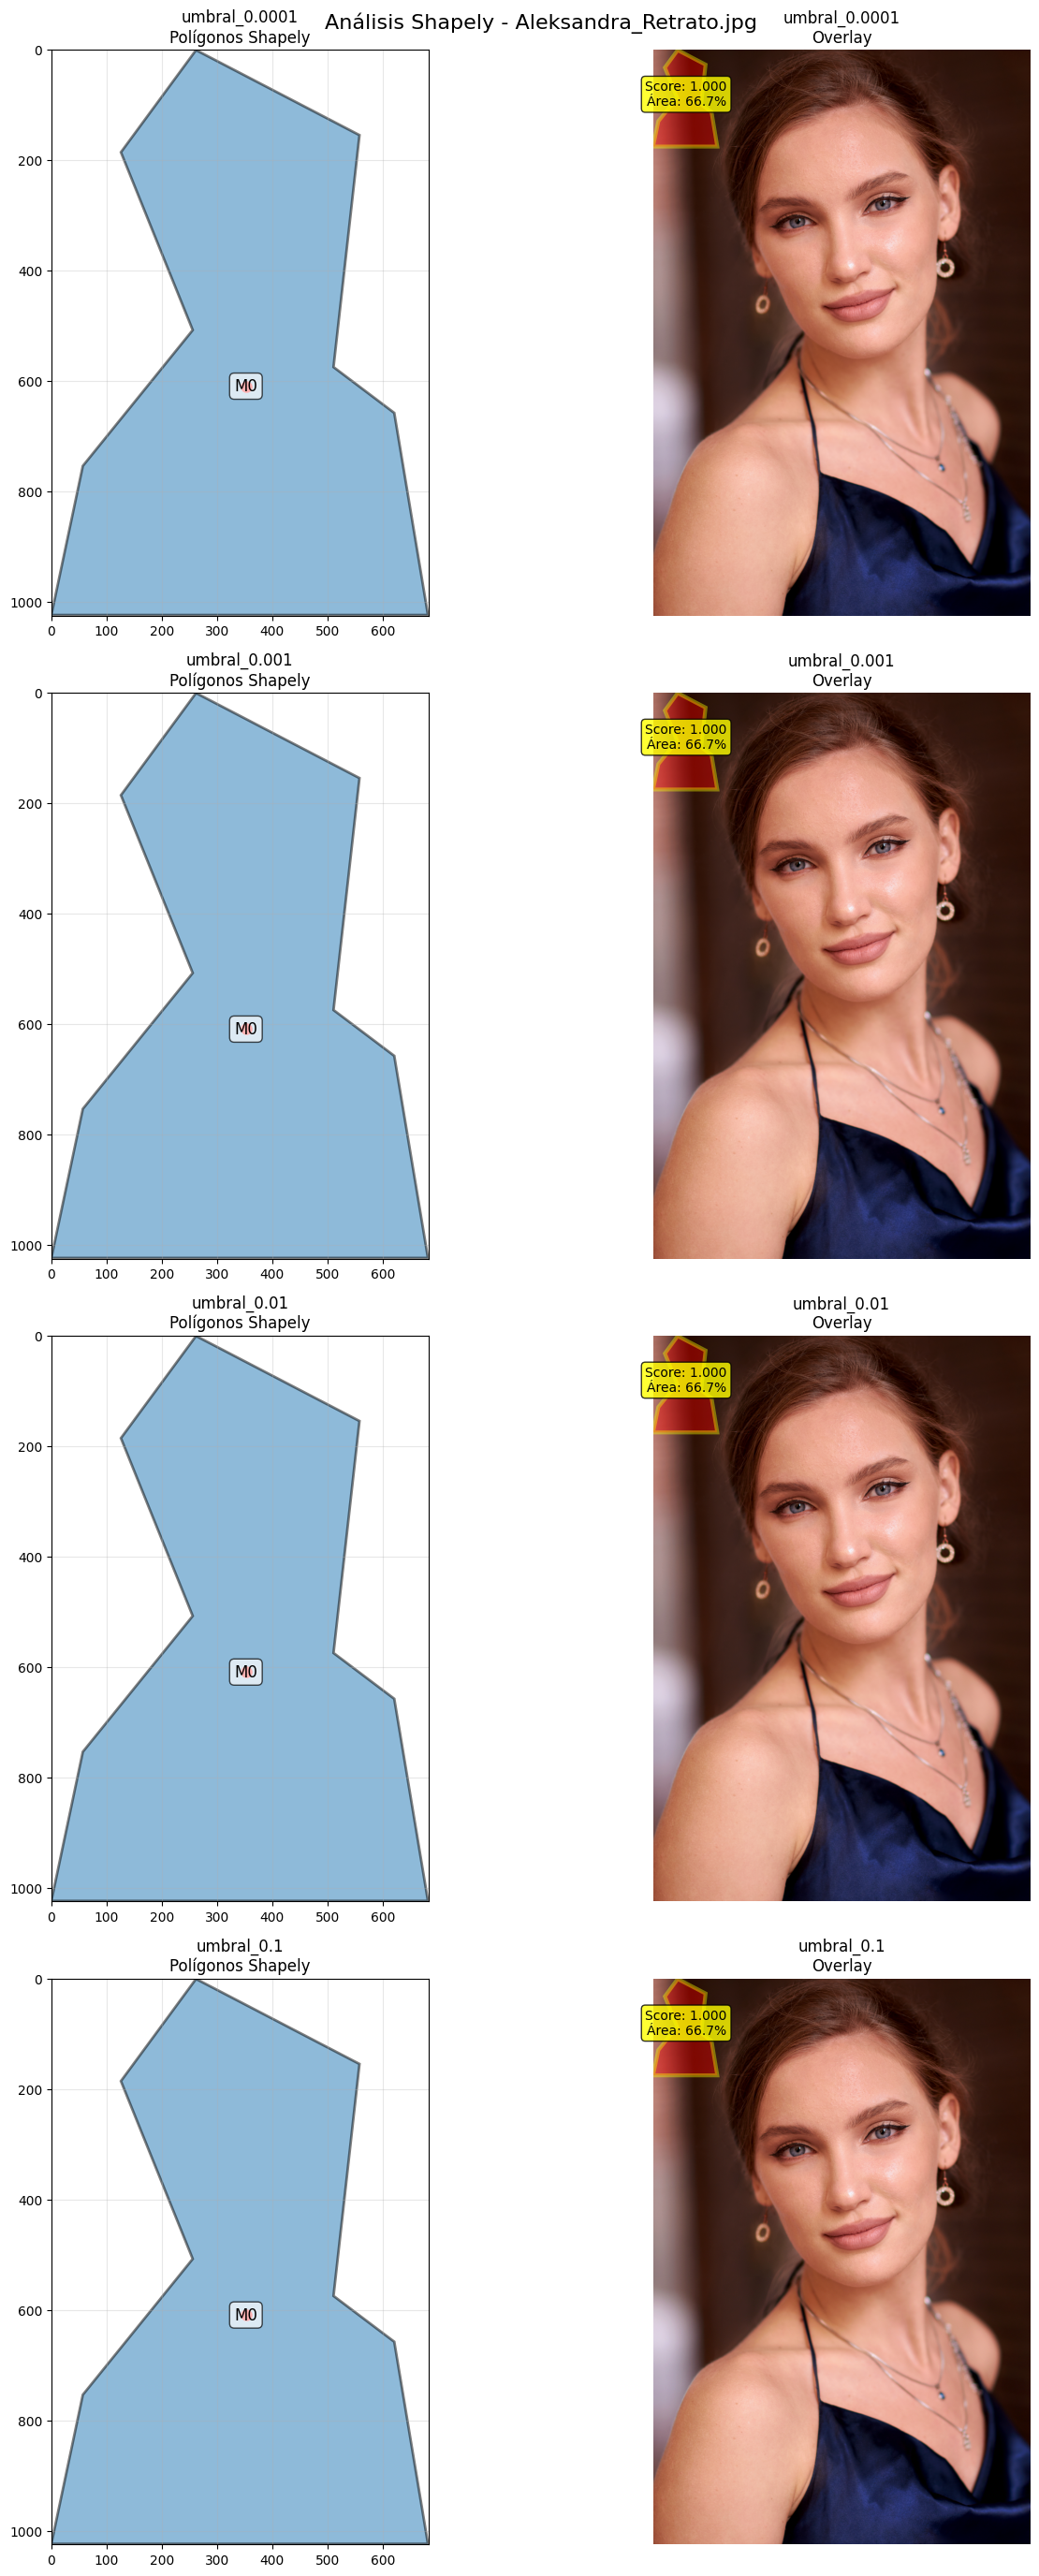


ESTADÍSTICAS GLOBALES SHAPELY

umbral_0.0001:
  Máscaras exitosas: 1
  Área media: 66.68%
  Área std: 0.00%
  Compacidad media: 0.506
  Roughness medio: 0.000

umbral_0.001:
  Máscaras exitosas: 1
  Área media: 66.68%
  Área std: 0.00%
  Compacidad media: 0.506
  Roughness medio: 0.000

umbral_0.01:
  Máscaras exitosas: 1
  Área media: 66.68%
  Área std: 0.00%
  Compacidad media: 0.506
  Roughness medio: 0.000

umbral_0.1:
  Máscaras exitosas: 1
  Área media: 66.68%
  Área std: 0.00%
  Compacidad media: 0.506
  Roughness medio: 0.000


In [8]:
import json
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
from shapely import wkt
from shapely.geometry import Polygon
from matplotlib.patches import Polygon as MplPolygon

# Cargar JSON
ruta_json = '/content/drive/MyDrive/TFM/mask2former/resultados/ejecucion_20250930_211024/swin-base-ade-semantic/swin-base-ade-semantic_ultra_sensible_20250930_211415.json'

print("Cargando JSON...")
with open(ruta_json, 'r') as f:
    datos = json.load(f)
print("Cargado\n")

# Seleccionar imagen
idx_imagen = 0
resultado = datos['resultados_detallados'][idx_imagen]

nombre_archivo = resultado['imagen']['archivo']
ruta_imagen = resultado['imagen']['ruta_completa']

print(f"Visualizando geometría Shapely: {nombre_archivo}\n")

# Cargar imagen original
img_original = None
try:
    img_original = Image.open(ruta_imagen)
except:
    print("Imagen original no disponible")

# Dimensiones
dims = resultado['imagen']['caracteristicas_avanzadas']['metadatos_basicos']['dimensiones']
width, height = dims['ancho'], dims['alto']

# Procesar todos los umbrales
detecciones = resultado['deteccion']['detecciones_por_umbral']
umbrales = sorted(detecciones.keys())

# Crear figura
num_umbrales = len(umbrales)
fig, axes = plt.subplots(num_umbrales, 2, figsize=(15, 7*num_umbrales))

if num_umbrales == 1:
    axes = axes.reshape(1, -1)

for i, umbral_key in enumerate(umbrales):
    deteccion = detecciones[umbral_key]

    print(f"\n{umbral_key}:")

    # Extraer análisis de máscaras
    analisis = deteccion.get('analisis_mascaras_avanzado')

    if not analisis or not analisis.get('mascaras_individuales'):
        print("  No hay análisis Shapely disponible")
        continue

    # Columna 1: Polígonos Shapely puros
    ax1 = axes[i, 0]
    ax1.set_xlim(0, width)
    ax1.set_ylim(height, 0)
    ax1.set_aspect('equal')
    ax1.set_title(f'{umbral_key}\nPolígonos Shapely')

    # Columna 2: Overlay sobre imagen
    ax2 = axes[i, 1]
    if img_original:
        ax2.imshow(img_original)
    ax2.set_title(f'{umbral_key}\nOverlay')

    # Procesar cada máscara
    mascaras_individuales = analisis['mascaras_individuales']
    print(f"  Máscaras individuales: {len(mascaras_individuales)}")

    for j, mascara_data in enumerate(mascaras_individuales):
        if 'error' in mascara_data:
            print(f"    Máscara {j}: Error - {mascara_data.get('error')}")
            continue

        shapely_geom = mascara_data.get('shapely_geometry', {})

        if not shapely_geom.get('polygon_valido'):
            print(f"    Máscara {j}: Polígono no válido")
            continue

        # Parsear polígono WKT
        polygon_str = shapely_geom.get('polygon')
        if not polygon_str or polygon_str == "None":
            print(f"    Máscara {j}: Sin datos de polígono")
            continue

        try:
            polygon = wkt.loads(polygon_str)
            coords = list(polygon.exterior.coords)

            # Características geométricas
            geom_features = mascara_data.get('caracteristicas_geometricas', {})
            area_pct = geom_features.get('area_percentage', 0)
            compactness = geom_features.get('compactness', 0)

            print(f"    Máscara {j}:")
            print(f"      Vértices: {len(coords)}")
            print(f"      Área: {area_pct:.2f}%")
            print(f"      Compacidad: {compactness:.3f}")
            print(f"      Convexidad: {shapely_geom.get('convexity_ratio', 0):.3f}")

            # Dibujar en ambos axes
            # Polígono puro
            poly_patch1 = MplPolygon(coords,
                                    facecolor=f'C{j}',
                                    edgecolor='black',
                                    alpha=0.5,
                                    linewidth=2)
            ax1.add_patch(poly_patch1)

            # Centroide
            centroid = shapely_geom.get('centroid_shapely', [0, 0])
            ax1.plot(centroid[0], centroid[1], 'ro', markersize=8)
            ax1.text(centroid[0], centroid[1], f'M{j}',
                    fontsize=12, ha='center', va='center',
                    bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))

            # Overlay
            poly_patch2 = MplPolygon(coords,
                                    facecolor='red',
                                    edgecolor='yellow',
                                    alpha=0.4,
                                    linewidth=3)
            ax2.add_patch(poly_patch2)

            # Score de confianza
            score = mascara_data.get('score_confianza', 0)
            ax2.text(centroid[0], centroid[1]-20,
                    f'Score: {score:.3f}\nÁrea: {area_pct:.1f}%',
                    fontsize=10, ha='center',
                    bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.8))

        except Exception as e:
            print(f"    Máscara {j}: Error parseando - {str(e)}")

    ax1.grid(True, alpha=0.3)
    ax2.axis('off')

plt.suptitle(f'Análisis Shapely - {nombre_archivo}', fontsize=16)
plt.tight_layout()
plt.show()

# Estadísticas globales Shapely
print("\n" + "="*60)
print("ESTADÍSTICAS GLOBALES SHAPELY")
print("="*60)

for umbral_key in umbrales:
    deteccion = detecciones[umbral_key]
    analisis = deteccion.get('analisis_mascaras_avanzado')

    if analisis and analisis.get('estadisticas_globales'):
        stats = analisis['estadisticas_globales']
        print(f"\n{umbral_key}:")
        print(f"  Máscaras exitosas: {stats.get('mascaras_exitosas', 0)}")

        areas = stats.get('areas_estadisticas', {})
        if areas:
            print(f"  Área media: {areas.get('mean', 0):.2f}%")
            print(f"  Área std: {areas.get('std', 0):.2f}%")

        compactness = stats.get('compactness_estadisticas', {})
        if compactness:
            print(f"  Compacidad media: {compactness.get('mean', 0):.3f}")

        roughness = stats.get('roughness_estadisticas', {})
        if roughness:
            print(f"  Roughness medio: {roughness.get('mean', 0):.3f}")

Cargando JSON...
Cargado

Total de imágenes en el JSON: 3

[0] Procesando: Aleksandra_Retrato.jpg
    Máscara: (1024, 683), Cobertura: 66.7%
[1] Procesando: Anastasiia_Completo.jpg
    Máscara: (1024, 683), Cobertura: 31.8%
[2] Procesando: Celia_MedioPlano.jpg
    Máscara: (1024, 683), Cobertura: 39.3%


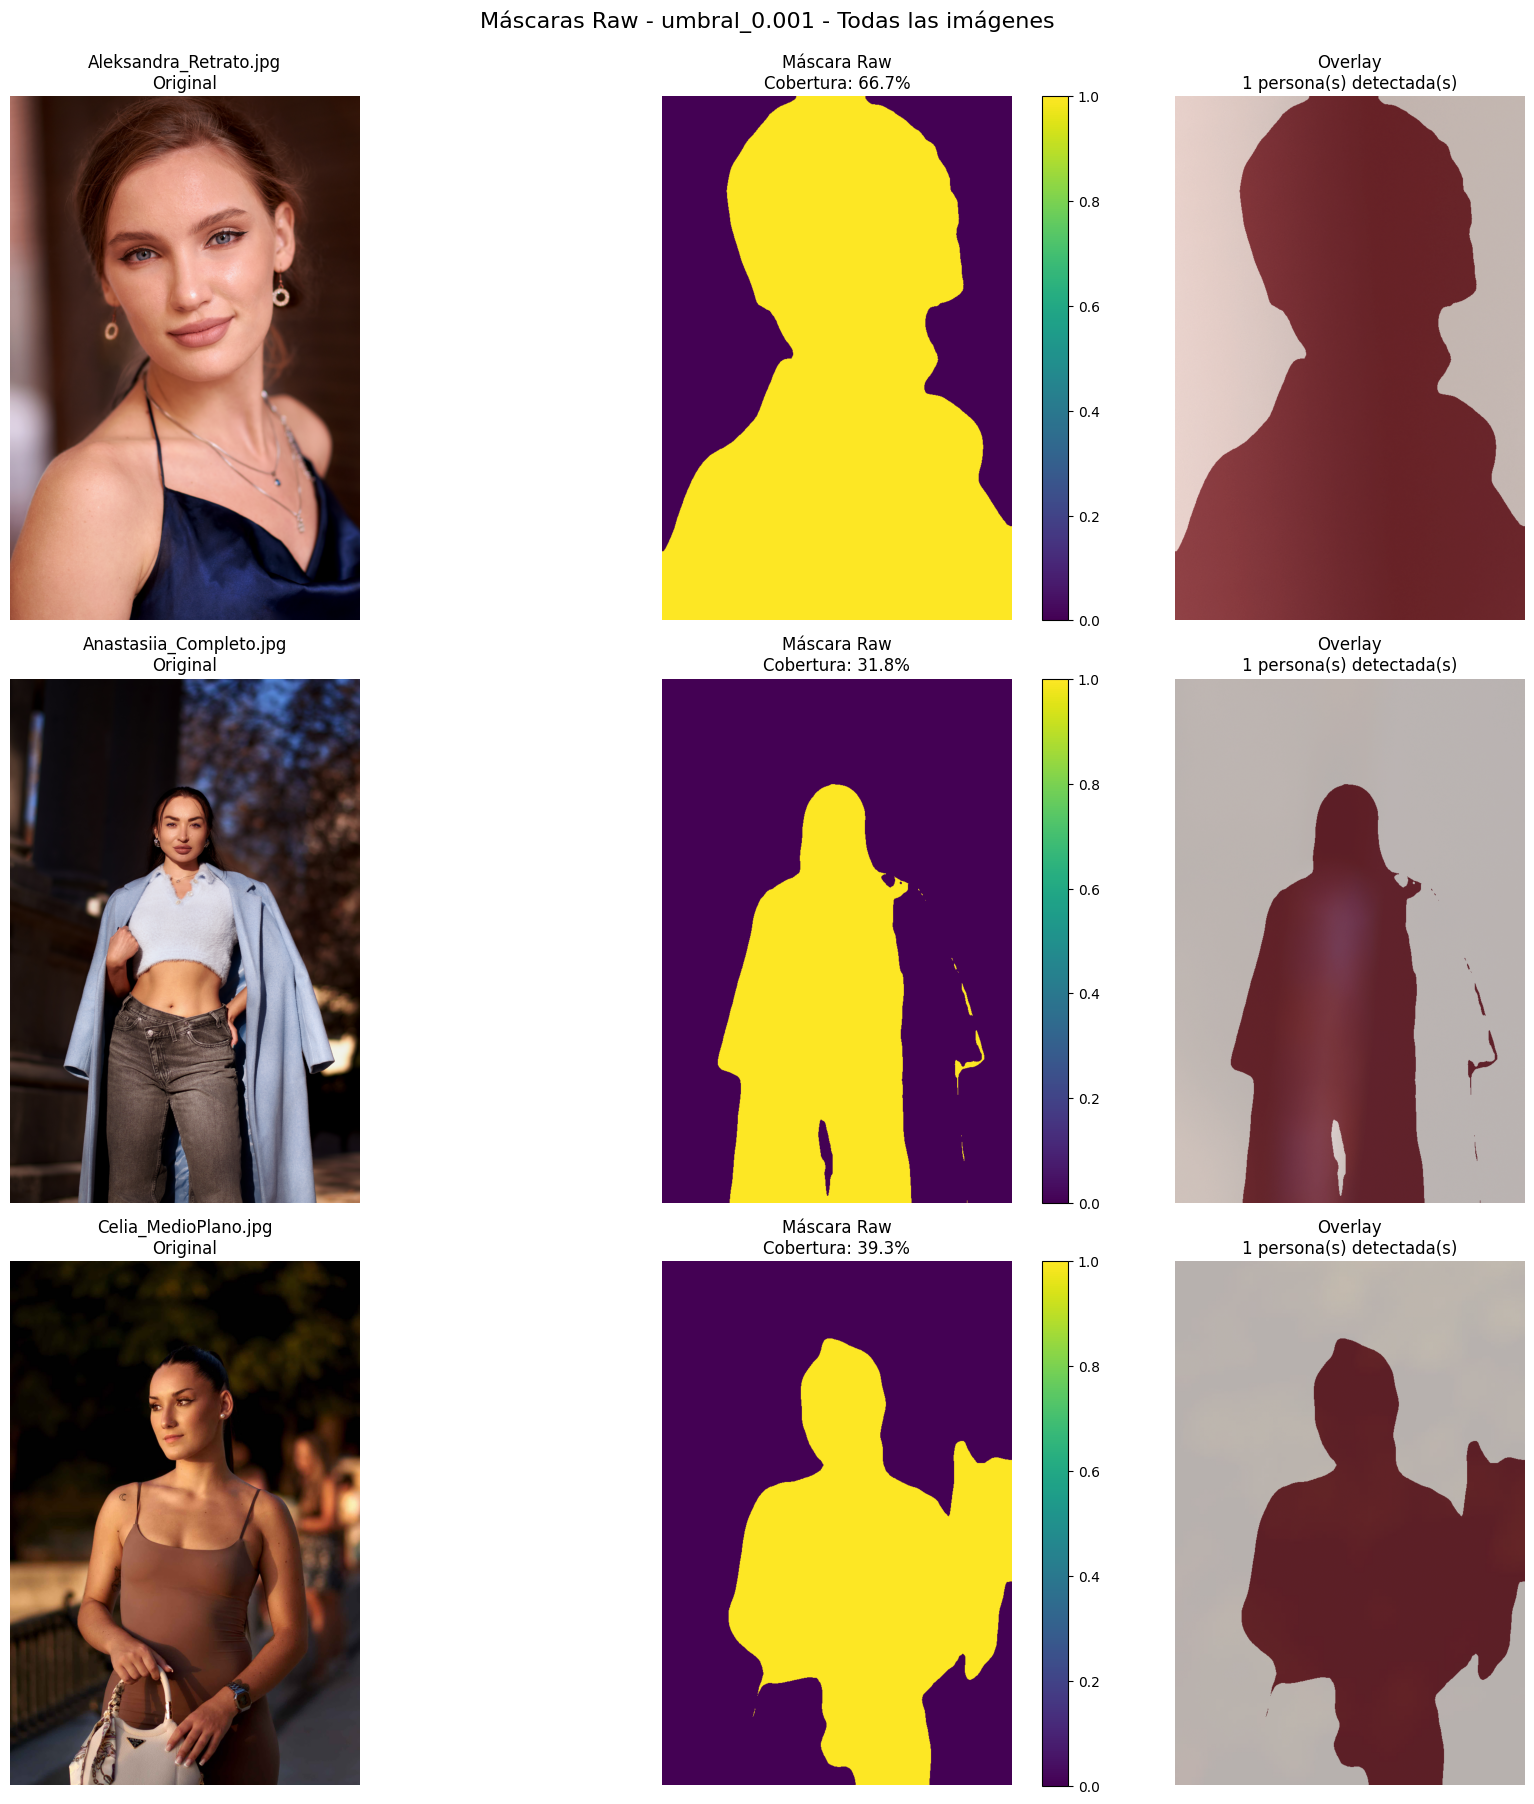


RESUMEN - umbral_0.001

Aleksandra_Retrato.jpg:
  Personas: 1
  Píxeles activos: 466,354
  Cobertura: 66.68%

Anastasiia_Completo.jpg:
  Personas: 1
  Píxeles activos: 222,720
  Cobertura: 31.84%

Celia_MedioPlano.jpg:
  Personas: 1
  Píxeles activos: 275,012
  Cobertura: 39.32%


In [9]:
import json
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Cargar JSON
ruta_json = '/content/drive/MyDrive/TFM/mask2former/resultados/ejecucion_20250930_211024/swin-base-ade-semantic/swin-base-ade-semantic_ultra_sensible_20250930_211415.json'

print("Cargando JSON...")
with open(ruta_json, 'r') as f:
    datos = json.load(f)
print("Cargado\n")

# Total de imágenes
total_imagenes = len(datos['resultados_detallados'])
print(f"Total de imágenes en el JSON: {total_imagenes}\n")

# Seleccionar un umbral específico para visualizar
umbral_seleccionado = 'umbral_0.001'  # Puedes cambiarlo

# Crear figura con 3 filas (una por imagen) y 3 columnas
fig, axes = plt.subplots(total_imagenes, 3, figsize=(18, 6*total_imagenes))

for idx in range(total_imagenes):
    resultado = datos['resultados_detallados'][idx]

    nombre_archivo = resultado['imagen']['archivo']
    ruta_imagen = resultado['imagen']['ruta_completa']

    print(f"[{idx}] Procesando: {nombre_archivo}")

    # Cargar imagen original
    img_original = None
    try:
        img_original = Image.open(ruta_imagen)
    except:
        print(f"    No se pudo cargar imagen original")

    # Obtener detección del umbral seleccionado
    deteccion = resultado['deteccion']['detecciones_por_umbral'][umbral_seleccionado]

    # Extraer máscara raw
    mascara_raw = None
    if 'mascara_raw' in deteccion and deteccion['mascara_raw']:
        mascara_raw = np.array(deteccion['mascara_raw'])
        pixels_activos = np.sum(mascara_raw > 0.5)
        cobertura = pixels_activos / mascara_raw.size * 100
        print(f"    Máscara: {mascara_raw.shape}, Cobertura: {cobertura:.1f}%")
    else:
        print(f"    Sin máscara raw")

    # Columna 1: Imagen original
    if img_original:
        axes[idx, 0].imshow(img_original)
    else:
        axes[idx, 0].text(0.5, 0.5, 'Imagen no disponible',
                         ha='center', va='center', transform=axes[idx, 0].transAxes)
    axes[idx, 0].set_title(f'{nombre_archivo}\nOriginal')
    axes[idx, 0].axis('off')

    # Columna 2: Máscara raw
    if mascara_raw is not None:
        im = axes[idx, 1].imshow(mascara_raw, cmap='viridis', vmin=0, vmax=1)
        pixels_activos = np.sum(mascara_raw > 0.5)
        cobertura = pixels_activos / mascara_raw.size * 100
        axes[idx, 1].set_title(f'Máscara Raw\nCobertura: {cobertura:.1f}%')
        plt.colorbar(im, ax=axes[idx, 1], fraction=0.046)
    else:
        axes[idx, 1].text(0.5, 0.5, 'Sin máscara',
                         ha='center', va='center', transform=axes[idx, 1].transAxes)
        axes[idx, 1].set_title('Máscara no disponible')
    axes[idx, 1].axis('off')

    # Columna 3: Overlay
    if img_original and mascara_raw is not None:
        axes[idx, 2].imshow(img_original, alpha=0.7)
        axes[idx, 2].imshow(mascara_raw, cmap='Reds', alpha=0.6, vmin=0, vmax=1)
        personas = deteccion.get('personas_detectadas', 0)
        axes[idx, 2].set_title(f'Overlay\n{personas} persona(s) detectada(s)')
    else:
        axes[idx, 2].text(0.5, 0.5, 'Overlay no disponible',
                         ha='center', va='center', transform=axes[idx, 2].transAxes)
        axes[idx, 2].set_title('Overlay')
    axes[idx, 2].axis('off')

plt.suptitle(f'Máscaras Raw - {umbral_seleccionado} - Todas las imágenes',
             fontsize=16, y=0.995)
plt.tight_layout()
plt.show()

# Resumen estadístico
print("\n" + "="*60)
print(f"RESUMEN - {umbral_seleccionado}")
print("="*60)
for idx in range(total_imagenes):
    resultado = datos['resultados_detallados'][idx]
    nombre = resultado['imagen']['archivo']
    deteccion = resultado['deteccion']['detecciones_por_umbral'][umbral_seleccionado]

    personas = deteccion.get('personas_detectadas', 0)

    if 'mascara_raw' in deteccion and deteccion['mascara_raw']:
        mascara = np.array(deteccion['mascara_raw'])
        pixels = np.sum(mascara > 0.5)
        cobertura = pixels / mascara.size * 100
        print(f"\n{nombre}:")
        print(f"  Personas: {personas}")
        print(f"  Píxeles activos: {pixels:,}")
        print(f"  Cobertura: {cobertura:.2f}%")
    else:
        print(f"\n{nombre}: Sin máscara")